<a href="https://colab.research.google.com/github/Tarotar30127/cs180/blob/main/04_wrangling.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<a href="https://colab.research.google.com/github/rhodes-byu/cs180-winter25/blob/main/labs/04-wrangling.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a><p><b>After clicking the "Open in Colab" link, copy the notebook to your own Google Drive before getting started, or it will not save your work</b></p>

# BYU CS 180 Lab 4: Data Wrangling

## Introduction:
In this lab, we will analyze college football data from the years 2016-2020. The data is spread across multiple files and will require a bit of “data wrangling”.

Once we have cleaned and processed the data, we will put our statistics knowledge to good use by digging a little deeper than simple summary statistics.

Very rarely are data scientists handed a pristine data set ready for analysis. More often than not, quite a bit of work is required to clean and preprocess the data so that it's ready for analysis.

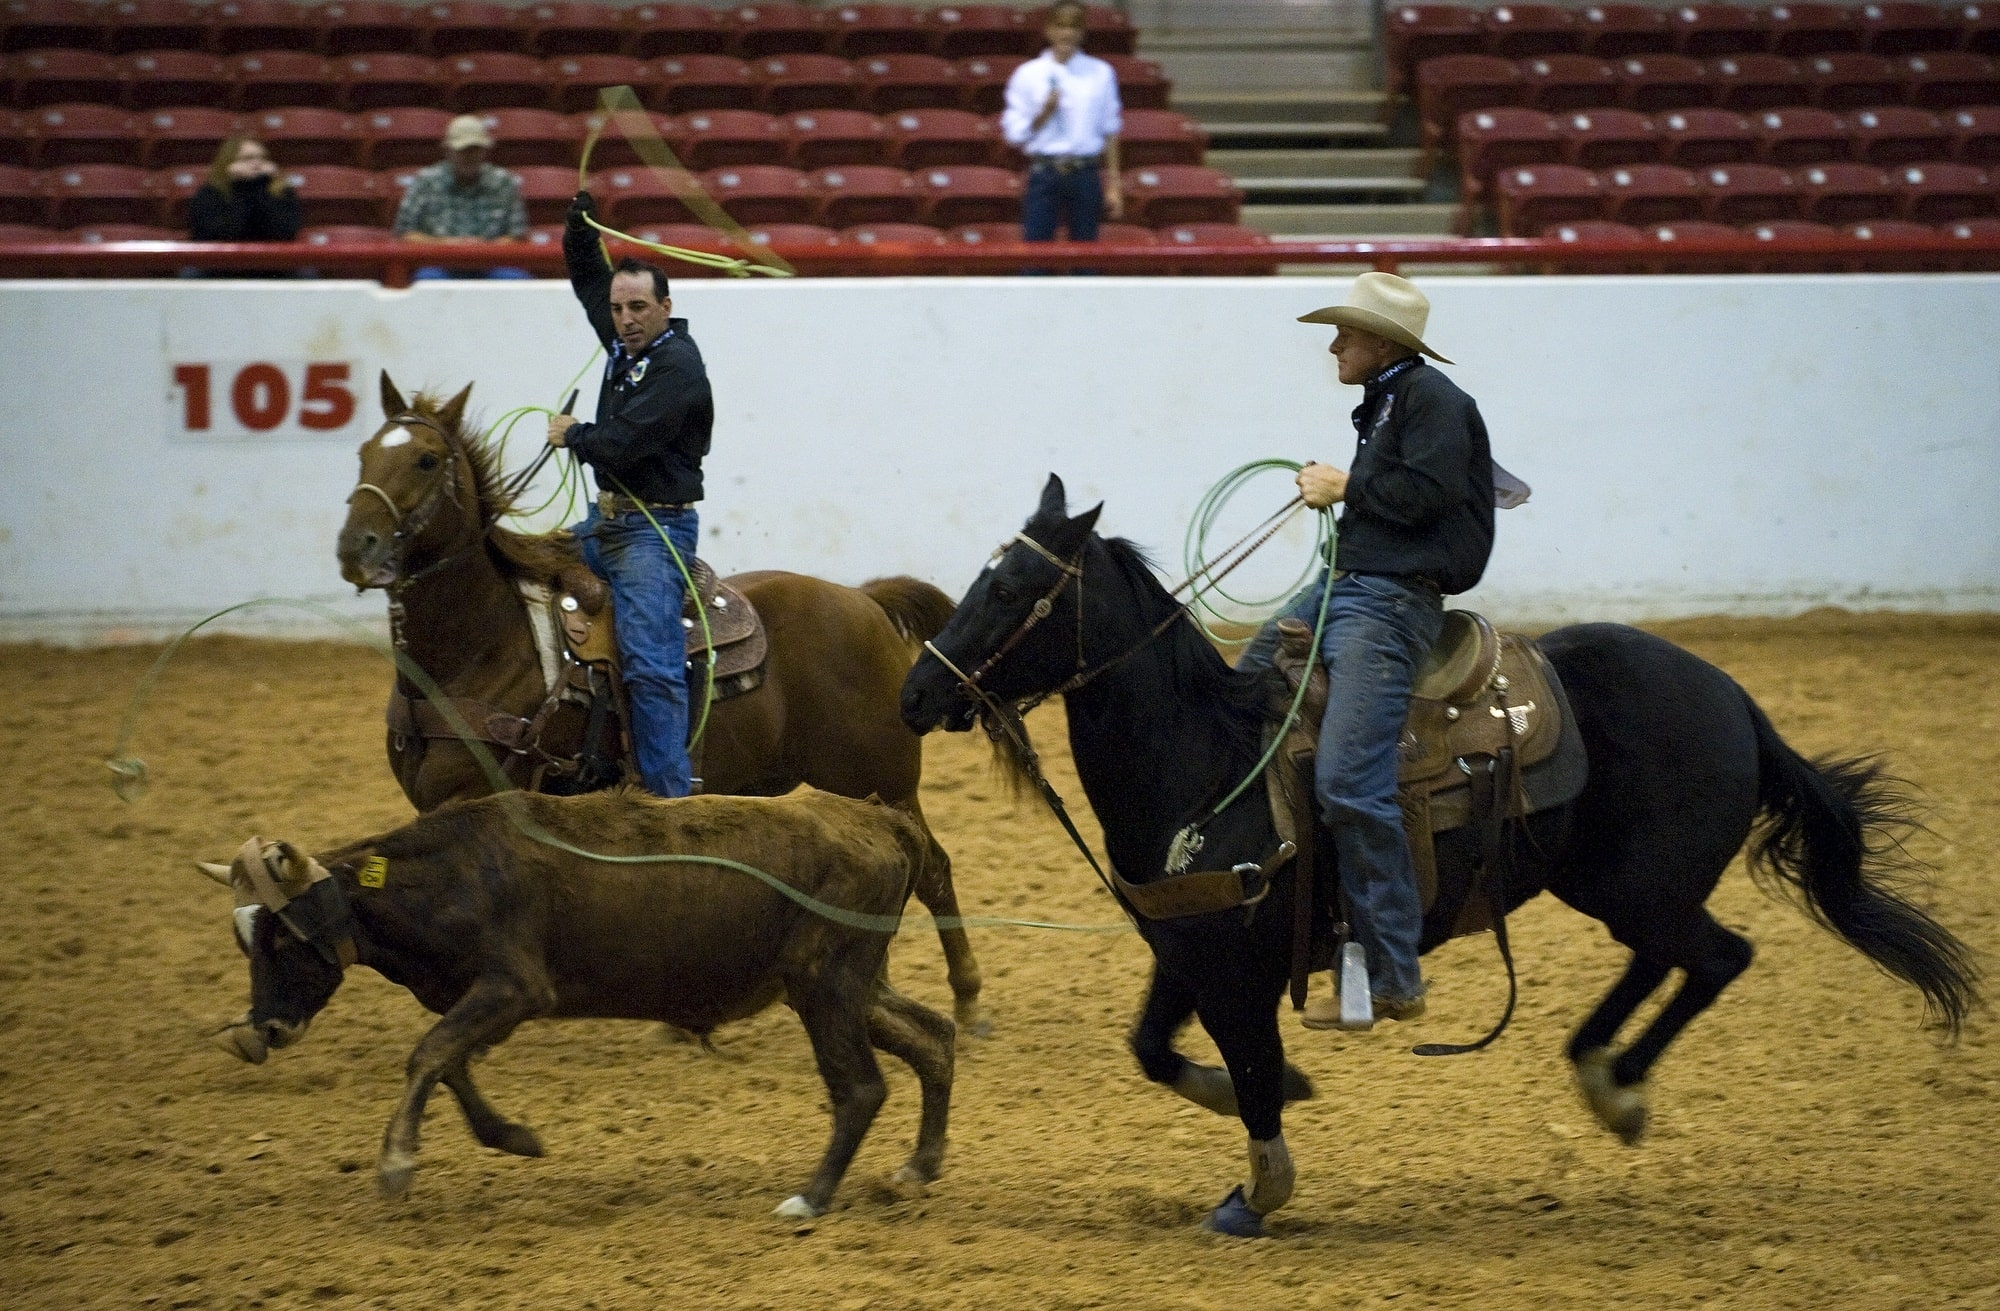

**Data wrangling**, also called **data cleaning**, **data remediation**, or **data munging**, refers to a variety of processes designed to transform raw data into more readily usable formats. The exact methods differ from project to project depending on the data you’re leveraging and the goal you’re trying to achieve.

Some examples of data wrangling include:

- Merging multiple data sources into a single dataset for analysis.

- Identifying gaps in data (for example, empty cells in a spreadsheet) and either filling or deleting them.

- Deleting data that’s either unnecessary or irrelevant to the project you’re working on.

- Identifying extreme outliers in data and either explaining the discrepancies or removing them.

#### Measures of Variability
We are very used to comparing point estimates. For example, in order to tell if one thing is better than the other, we may look at the average of each over time. Consider the following plot comparing the average of two groups, mu_0 and mu_1.

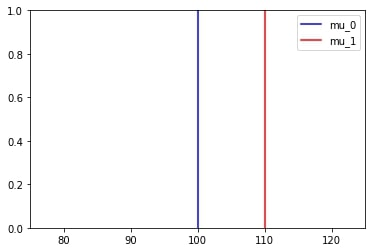

In this case, we might conclude that mu_1 is greater because it’s average is higher. However, we are ignoring an important aspect of the data: its variability.

When we plot the **variability and the mean**, we observe the following plot:

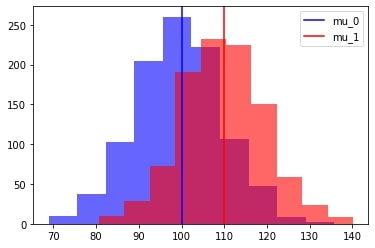

Now the distributions of mu_1 and mu_0 are so close that it’s difficult to say with certainty that mu_1 is better. For any random draw of mu_1, it’s roughly a 50-50 chance to actually be greater than a random draw of mu_0.

Now suppose we observe the following plot:

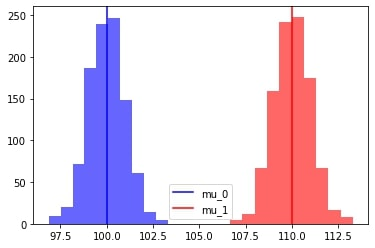

While the means are the same as before, the variability of the two distributions are now very different. We can say with a high degree of certainty that mu_1 is higher.

Keep this idea in mind as you analyze the dataset for this lab.

### **Data:**
Data from the 2016, 2017, 2018, 2019, and 2020 college football seasons are also available on the course GitHub:

In [ ]:
# Download the data located at the following URLs
cfb16_url = "https://raw.githubusercontent.com/rhodes-byu/cs180-winter25/refs/heads/main/labs/data/cfb16.csv"
cfb17_url = "https://raw.githubusercontent.com/rhodes-byu/cs180-winter25/refs/heads/main/labs/data/cfb17.csv"
cfb18_url = "https://raw.githubusercontent.com/rhodes-byu/cs180-winter25/refs/heads/main/labs/data/cfb18.csv"
cfb19_url = "https://raw.githubusercontent.com/rhodes-byu/cs180-winter25/refs/heads/main/labs/data/cfb19.csv"
cfb20_url = "https://raw.githubusercontent.com/rhodes-byu/cs180-winter25/refs/heads/main/labs/data/cfb20.csv"

## Exercise 1: Yearly Counts

### Exercise Question
Read in the files, and add a year column to each file (from the original .csv file name).

In [ ]:
# Write your code to read in the files and add the year values from each csv:
import pandas as pd;

# Read the CSV files
df_2016 = pd.read_csv(cfb16_url)
df_2017 = pd.read_csv(cfb17_url)
df_2018 = pd.read_csv(cfb18_url)
df_2019 = pd.read_csv(cfb19_url)
df_2020 = pd.read_csv(cfb20_url)

# Add a 'Year' column to each DataFrame
df_2016["Year"] = 2016
df_2017["Year"] = 2017
df_2018["Year"] = 2018
df_2019["Year"] = 2019
df_2020["Year"] = 2020


## Exercise 2: Data Aggregation

### Exercise Question
Combine every file into a single dataframe.

In [ ]:
# Write your code to combine all of the csvs into one dataframe here:
df_combined = pd.concat([df_2016, df_2017, df_2018, df_2019, df_2020], ignore_index=True)
print(df_combined)

                           Team  Games  Win  Loss  Off.Rank  Off.Plays  \
0                   Akron (MAC)     12    5     7        84        776   
1                 Alabama (SEC)     15   14     1        34       1056   
2    Appalachian St. (Sun Belt)     13   10     3        52        912   
3              Arizona (Pac-12)     12    3     9        67        815   
4          Arizona St. (Pac-12)     12    5     7        81        900   
..                          ...    ...  ...   ...       ...        ...   
626      West Virginia (Big 12)      9    5     4        42        690   
627         Western Ky. (C-USA)     11    5     6       120        699   
628         Western Mich. (MAC)      6    4     2        15        392   
629         Wisconsin (Big Ten)      6    3     3        93        431   
630     Wyoming (Mountain West)      6    2     4        82        409   

     Off.Yards  Off.Yards.Play  Off.TDs  Off.Yards.per.Game  ...  \
0         4649            5.99       38    

## Exercise 3: Conference Search

### Exercise Question
Create a `conference` field by parsing the `team` column.



Example:

| Team | Conference |
| --- | --- |
| Penn State University (Big Ten) | Big Ten |

In [ ]:
# Write your code to parse the conference from the team name:
import re;
conference = {}
for index, row in df_combined.iterrows():
    match = re.search(r"\((.*?)\)", row["Team"])
    df_combined.at[index, "Conference"] = match.group(1)
    conference[match.group(1)] = row["Team"].split("(")[0]


print(conference)
print(df_combined)


{'MAC': 'Western Mich. ', 'SEC': 'Vanderbilt ', 'Sun Belt': 'ULM ', 'Pac-12': 'Washington St. ', 'FBS Independent': 'Massachusetts ', 'Big 12': 'West Virginia ', 'ACC': 'Wake Forest ', 'C-USA': 'Western Ky. ', 'AAC': 'UCF ', 'Big Ten': 'Wisconsin ', 'FL': 'Miami ', 'OH': 'Miami ', 'MWC': 'Wyoming ', 'Independent': 'New Mexico St. ', 'Mountain West': 'Wyoming '}
                           Team  Games  Win  Loss  Off.Rank  Off.Plays  \
0                   Akron (MAC)     12    5     7        84        776   
1                 Alabama (SEC)     15   14     1        34       1056   
2    Appalachian St. (Sun Belt)     13   10     3        52        912   
3              Arizona (Pac-12)     12    3     9        67        815   
4          Arizona St. (Pac-12)     12    5     7        81        900   
..                          ...    ...  ...   ...       ...        ...   
626      West Virginia (Big 12)      9    5     4        42        690   
627         Western Ky. (C-USA)     11    5 

## Exercise 4: Big Ten Vs. South Eastern

### Exercise Question 4a: Offense
- Is there a statistical difference between the Big Ten Conference and the South Eastern Conference in terms of `Off.Yards.per.Game`? Use a [seaborn KDE]("https://seaborn.pydata.org/generated/seaborn.kdeplot.html") plot to create a figure. Comment on the difference in means and the overlap of distributions.

- Do the same as above for `Off.TDs`.

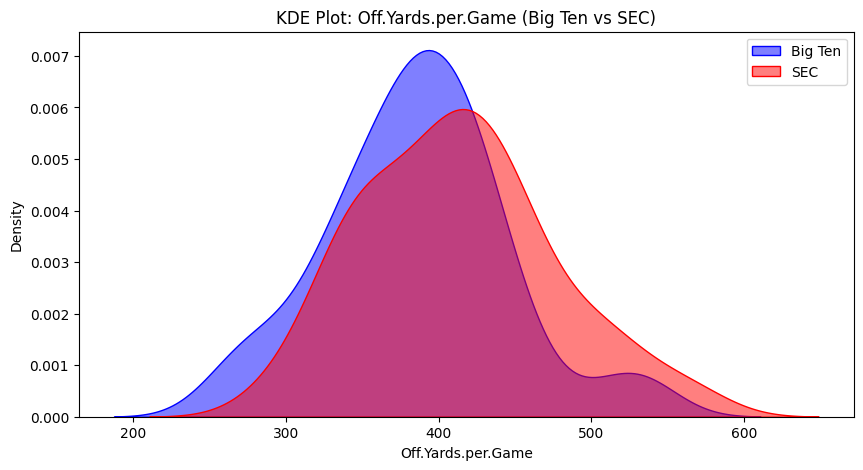

In [ ]:
# Write the code for the statistical differences for Off.Yards.per.Game:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Ensure Off.Yards.per.Game and Off.TDs are numeric
df_combined["Off.Yards.per.Game"] = pd.to_numeric(df_combined["Off.Yards.per.Game"], errors="coerce")


# Drop NaN values
df_combined = df_combined.dropna(subset=["Off.Yards.per.Game"])

# Filter data for Big Ten and SEC
big_ten = df_combined[df_combined["Conference"] == "Big Ten"]
sec = df_combined[df_combined["Conference"] == "SEC"]

# --- Compute Mean Differences ---
mean_big_ten_oy = big_ten["Off.Yards.per.Game"].mean()
mean_sec_oy = sec["Off.Yards.per.Game"].mean()


# --- KDE Plot for Off.Yards.per.Game ---
plt.figure(figsize=(10, 5))
sns.kdeplot(big_ten["Off.Yards.per.Game"], label="Big Ten", fill=True, color="blue", alpha=0.5)
sns.kdeplot(sec["Off.Yards.per.Game"], label="SEC", fill=True, color="red", alpha=0.5)
plt.title("KDE Plot: Off.Yards.per.Game (Big Ten vs SEC)")
plt.xlabel("Off.Yards.per.Game")
plt.ylabel("Density")
plt.legend()
plt.show()



Most teams in the sec and big ten average an offense of 400 yards per game. You can see that the SEC averages a bit more yards per game. This could be an effect of more talent or more competitve conference.



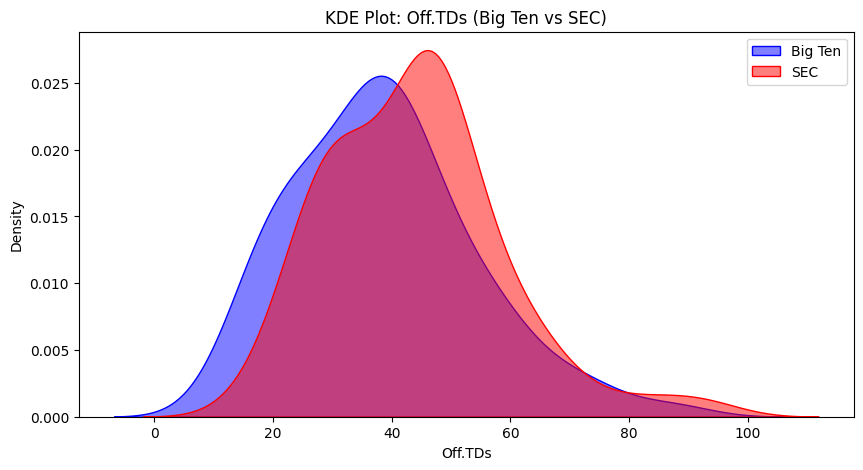

In [ ]:
# Write the code for the statistical differences for Off.TDs:
df_combined = df_combined.dropna(subset=["Off.Yards.per.Game", "Off.TDs"])
big_ten = df_combined[df_combined["Conference"] == "Big Ten"]
sec = df_combined[df_combined["Conference"] == "SEC"]
df_combined["Off.TDs"] = pd.to_numeric(df_combined["Off.TDs"], errors="coerce")
mean_big_ten_td = big_ten["Off.TDs"].mean()
mean_sec_td = sec["Off.TDs"].mean()

plt.figure(figsize=(10, 5))
sns.kdeplot(big_ten["Off.TDs"], label="Big Ten", fill=True, color="blue", alpha=0.5)
sns.kdeplot(sec["Off.TDs"], label="SEC", fill=True, color="red", alpha=0.5)
plt.title("KDE Plot: Off.TDs (Big Ten vs SEC)")
plt.xlabel("Off.TDs")
plt.ylabel("Density")
plt.legend()
plt.show()


It the last graph you could see that the SEC averaged more yards per game more than the Big Ten and it shows in touchdowns. The Sec averages more touchdowns per season than the big ten showing the offensive power in the conference

### Exercise Question 4b: Defense
- Is there a statistical difference between the Big Ten Conference and the South Eastern Conference in terms  of `Points.Allowed`? Use a  [seaborn KDE]("https://seaborn.pydata.org/generated/seaborn.kdeplot.html") plot to create a figure.  Comment on the difference in means and the overlap of distributions.

- Do the same as above for `Opp.Pass.Yds.Allowed` and `Opp.Rush.Yards.Allowed`.



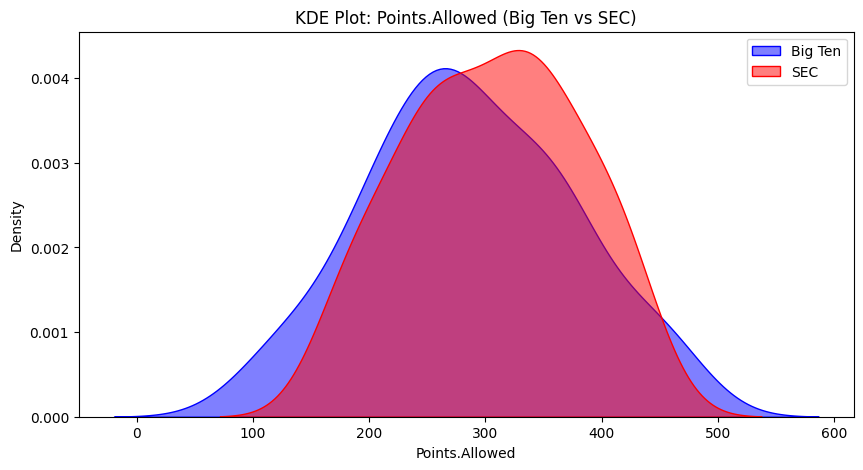

In [ ]:
# Write the code for the statistical differences for Points.Allowed:

df_combined["Points.Allowed"] = pd.to_numeric(df_combined["Points.Allowed"], errors="coerce")

# Drop NaN values
df_combined = df_combined.dropna(subset=["Points.Allowed"])

# Filter data for Big Ten and SEC
big_ten = df_combined[df_combined["Conference"] == "Big Ten"]
sec = df_combined[df_combined["Conference"] == "SEC"]

# --- Compute Mean Differences ---
mean_big_ten_pa = big_ten["Points.Allowed"].mean()
mean_sec_pa = sec["Points.Allowed"].mean()

# --- KDE Plot for Points.Allowed ---
plt.figure(figsize=(10, 5))
sns.kdeplot(big_ten["Points.Allowed"], label="Big Ten", fill=True, color="blue", alpha=0.5)
sns.kdeplot(sec["Points.Allowed"], label="SEC", fill=True, color="red", alpha=0.5)
plt.title("KDE Plot: Points.Allowed (Big Ten vs SEC)")
plt.xlabel("Points.Allowed")
plt.ylabel("Density")
plt.legend()
plt.show()

In this you can see the difference in defense per conference. Just looking at the graph without looking at the offense. You can assume that the big ten defense is elite holding defenses to an average of less than 250 points per season however when looking at it closely I think that the SEC defense is more elite not only is the offense elite but the defense of the SEC has a lower upper numer of just above 500.

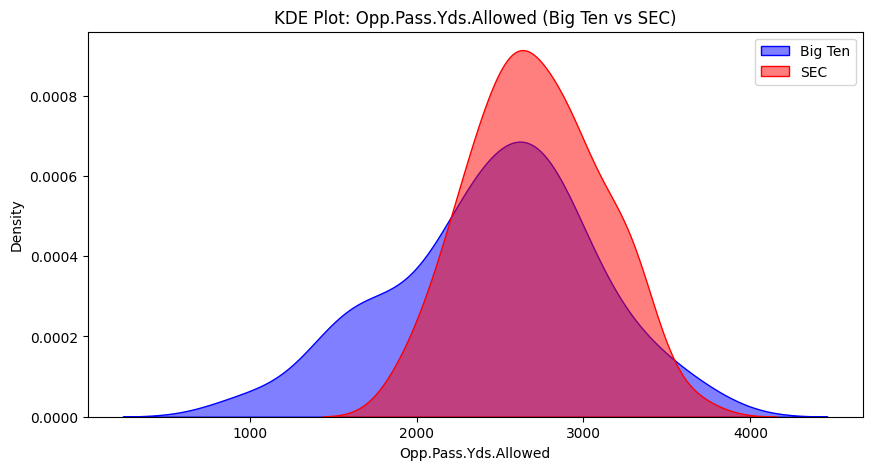

In [ ]:
# Write the code for the statistical differences for Opp.Pass.Yds.Allowed:
df_combined["Opp.Pass.Yds.Allowed"] = pd.to_numeric(df_combined["Opp.Pass.Yds.Allowed"], errors="coerce")

# Drop NaN values
df_combined = df_combined.dropna(subset=["Opp.Pass.Yds.Allowed"])

# Filter data for Big Ten and SEC
big_ten = df_combined[df_combined["Conference"] == "Big Ten"]
sec = df_combined[df_combined["Conference"] == "SEC"]

# --- Compute Mean Differences ---
mean_big_ten_pa = big_ten["Opp.Pass.Yds.Allowed"].mean()
mean_sec_pa = sec["Opp.Pass.Yds.Allowed"].mean()

# --- KDE Plot for Opp.Pass.Yds.Allowed ---
plt.figure(figsize=(10, 5))
sns.kdeplot(big_ten["Opp.Pass.Yds.Allowed"], label="Big Ten", fill=True, color="blue", alpha=0.5)
sns.kdeplot(sec["Opp.Pass.Yds.Allowed"], label="SEC", fill=True, color="red", alpha=0.5)
plt.title("KDE Plot: Opp.Pass.Yds.Allowed (Big Ten vs SEC)")
plt.xlabel("Opp.Pass.Yds.Allowed")
plt.ylabel("Density")
plt.legend()
plt.show()

The defense of the SEC is more consistent at holding the offense to around less than 3000 yards per season whereas the BIG Ten is more inconsistant at holding other team offenses per seasnon averages a wide spread show outilers of 1000 super eilte defense to 4000 a terrible defense.

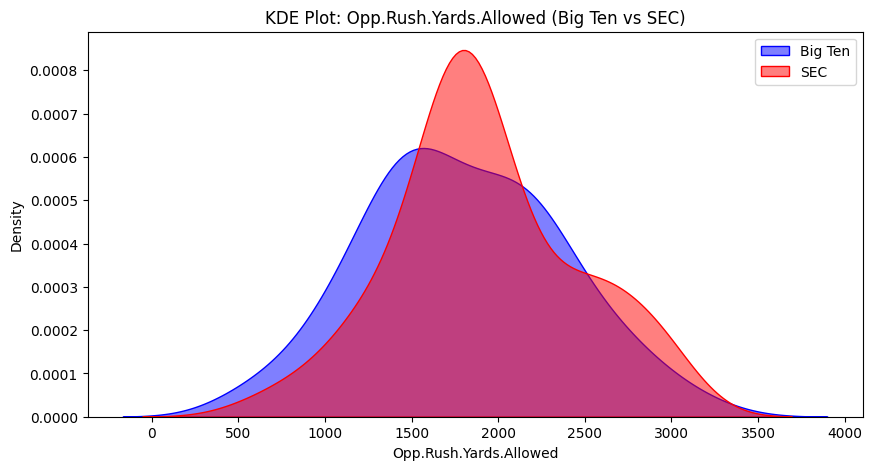

In [ ]:
df_combined["Opp.Rush.Yards.Allowed"] = pd.to_numeric(df_combined["Opp.Rush.Yards.Allowed"], errors="coerce")

# Drop NaN values
df_combined = df_combined.dropna(subset=["Opp.Rush.Yards.Allowed"])

# Filter data for Big Ten and SEC
big_ten = df_combined[df_combined["Conference"] == "Big Ten"]
sec = df_combined[df_combined["Conference"] == "SEC"]

# --- Compute Mean Differences ---
mean_big_ten_ora = big_ten["Opp.Rush.Yards.Allowed"].mean()
mean_sec_ora = sec["Opp.Rush.Yards.Allowed"].mean()

# --- KDE Plot for Opp.Rush.Yards.Allowed ---
plt.figure(figsize=(10, 5))
sns.kdeplot(big_ten["Opp.Rush.Yards.Allowed"], label="Big Ten", fill=True, color="blue", alpha=0.5)
sns.kdeplot(sec["Opp.Rush.Yards.Allowed"], label="SEC", fill=True, color="red", alpha=0.5)
plt.title("KDE Plot: Opp.Rush.Yards.Allowed (Big Ten vs SEC)")
plt.xlabel("Opp.Rush.Yards.Allowed")
plt.ylabel("Density")
plt.legend()
plt.show()

In this graph you can see the inconsistance of the BIG Ten and the consistance of the SEC. There are more outliers of the BIG Ten allowing from 500 yards to 4000 years The mean is not as established as the SEC which you can expect teams to defend the rush at around 1500 yards.

---



## Exercise 5: Offense Statistics

### Exercise Question 5a: Offense
Is the offense changing over time? Create some plots showing the average offensive production over time (each year). Include an estimate of the variability in your figures.

Comment on whether any trends you see are likely to be true or spurious.

Create a plot for the following metrics:
- `Off.Yards.per.Game`
- `Off.TDs`

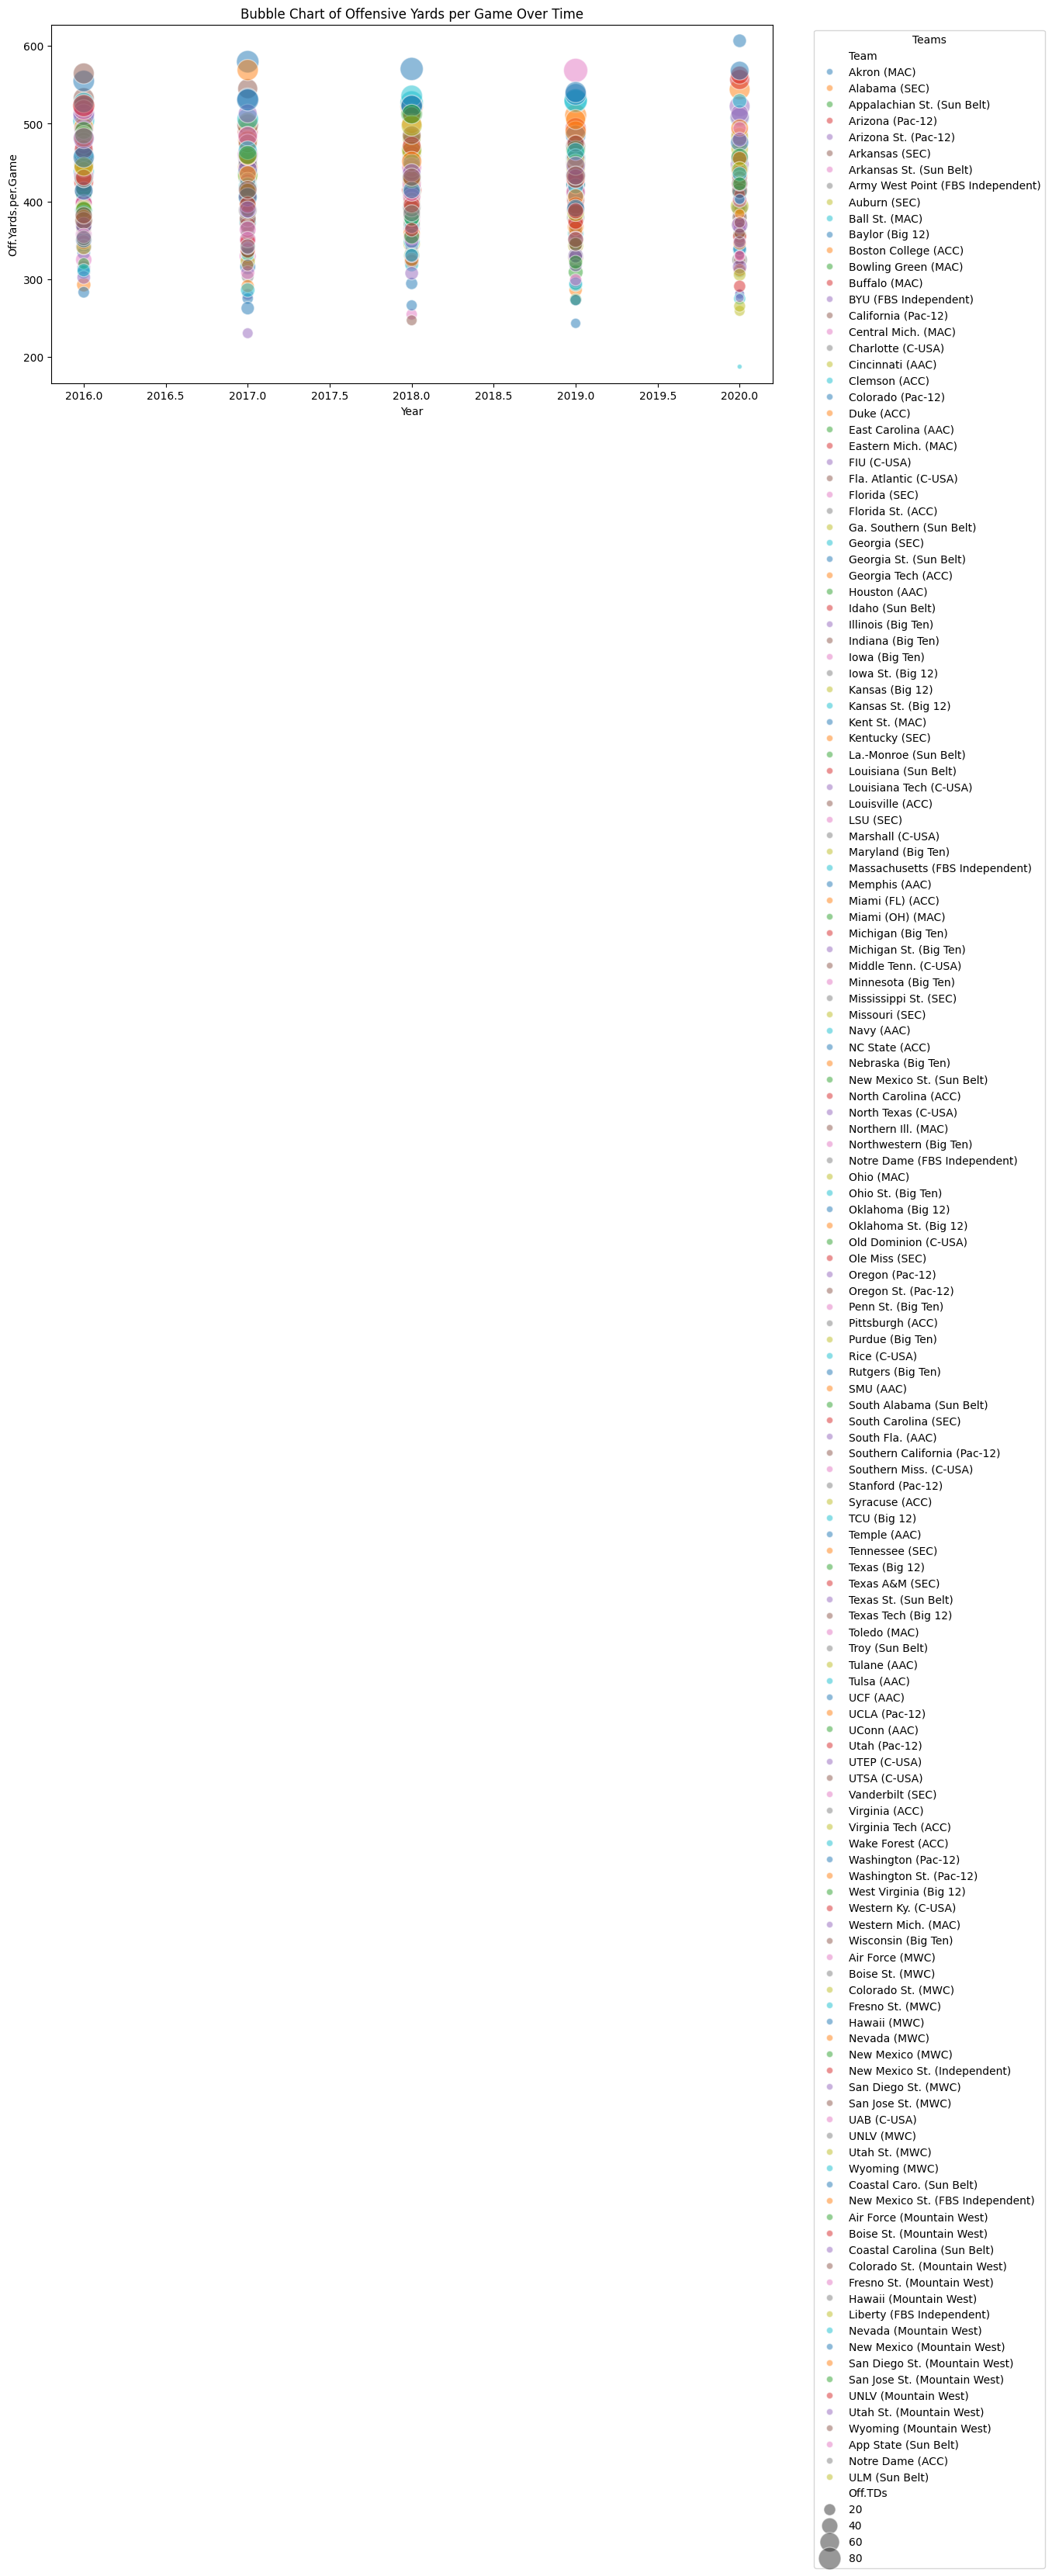

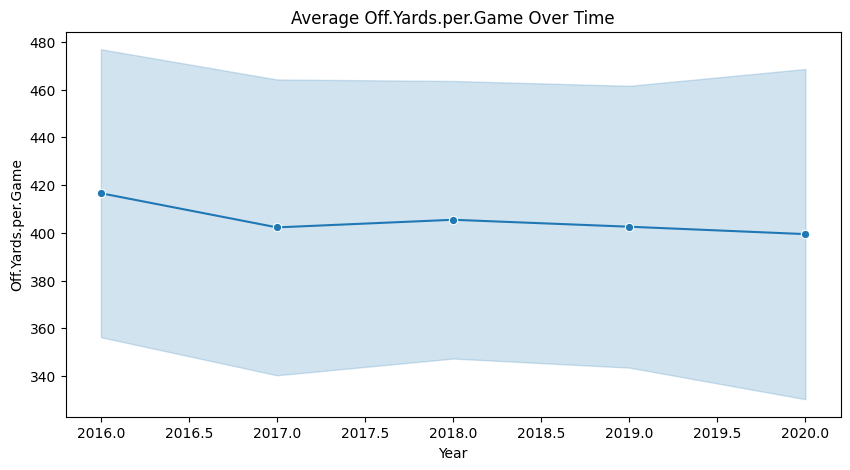

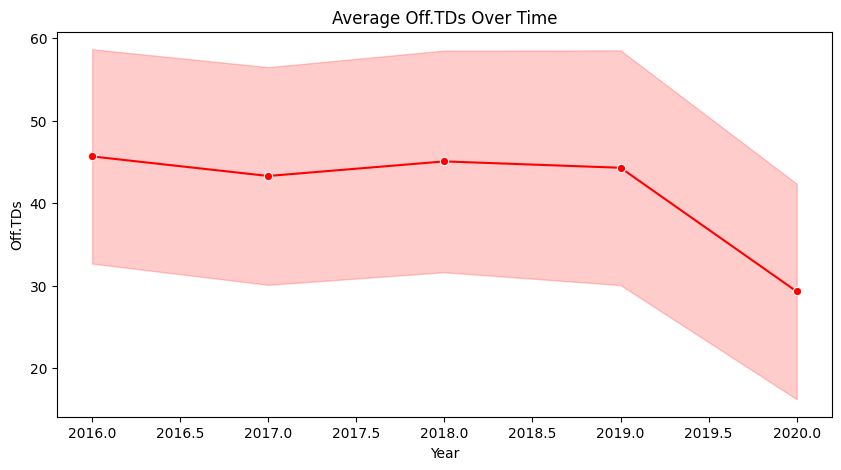

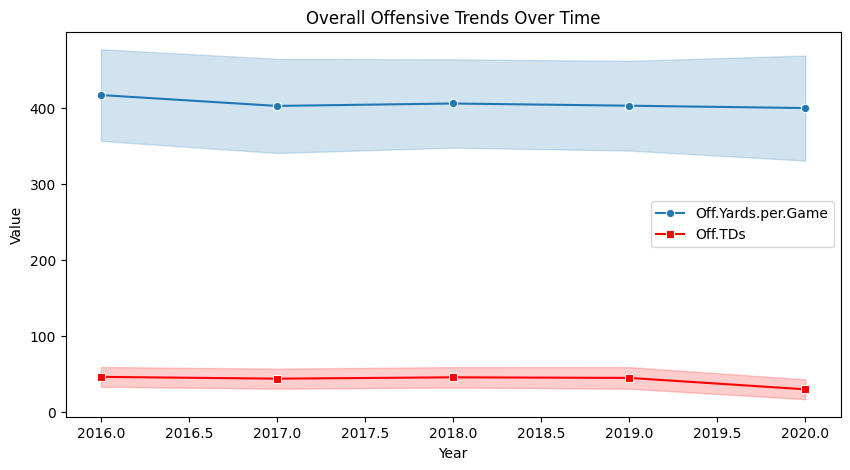

In [ ]:
# Create a few plots showing how each metric changed over time:
df_combined["Year"] = pd.to_numeric(df_combined["Year"], errors="coerce")
df_combined["Off.Yards.per.Game"] = pd.to_numeric(df_combined["Off.Yards.per.Game"], errors="coerce")
df_combined["Off.TDs"] = pd.to_numeric(df_combined["Off.TDs"], errors="coerce")

# Drop NaN values
df_combined = df_combined.dropna(subset=["Year", "Off.Yards.per.Game", "Off.TDs"])

# --- Bubble Chart for Teams Over Time ---
plt.figure(figsize=(12, 6))
sns.scatterplot(
    x="Year",
    y="Off.Yards.per.Game",
    hue="Team",  # Different colors for different teams
    size="Off.TDs",  # Bubble size based on offensive touchdowns
    data=df_combined,
    alpha=0.5,
    sizes=(20, 500),  # Adjusting bubble sizes
    palette="tab10"  # Ensures visually distinct colors for teams
)
plt.title("Bubble Chart of Offensive Yards per Game Over Time")
plt.xlabel("Year")
plt.ylabel("Off.Yards.per.Game")
plt.legend(title="Teams", bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

# --- Line Plot for Off.Yards.per.Game ---
plt.figure(figsize=(10, 5))
sns.lineplot(x="Year", y="Off.Yards.per.Game", data=df_combined, estimator="mean", errorbar='sd', marker="o")
plt.title("Average Off.Yards.per.Game Over Time")
plt.xlabel("Year")
plt.ylabel("Off.Yards.per.Game")
plt.show()

# --- Line Plot for Off.TDs ---
plt.figure(figsize=(10, 5))
sns.lineplot(x="Year", y="Off.TDs", data=df_combined, estimator="mean", errorbar='sd', marker="o", color="red")
plt.title("Average Off.TDs Over Time")
plt.xlabel("Year")
plt.ylabel("Off.TDs")
plt.show()

# --- Combined Offense Trends ---
plt.figure(figsize=(10, 5))
sns.lineplot(x="Year", y="Off.Yards.per.Game", data=df_combined, estimator="mean", errorbar='sd', marker="o", label="Off.Yards.per.Game")
sns.lineplot(x="Year", y="Off.TDs", data=df_combined, estimator="mean", errorbar='sd', marker="s", label="Off.TDs", color="red")
plt.title("Overall Offensive Trends Over Time")
plt.xlabel("Year")
plt.ylabel("Value")
plt.legend()
plt.show()

In these graphs, you can see that the offense has stay relatively stable over time. The has been a slight decrease in the mean which can be seen in the Overall offensive trend. You can see that the average of TD goes down 2020 but yard stays the same. This means in 2020 teams didn't convert on drives. When looking at the data there is one outler that may effect the data.

### Exercise Question 5b: Defense
Is the defense changing over time? Create some plots showing the average defensive production over time (each year). Include an estimate of the variability in your figures.

Comment on whether any trends you see are likely to be true or spurious.

Create a plot for the following metrics:
- `Points.Allowed`
- `Opp.Pass.Yds.Allowed`
- `Opp.Rush.Yards.Allowed`

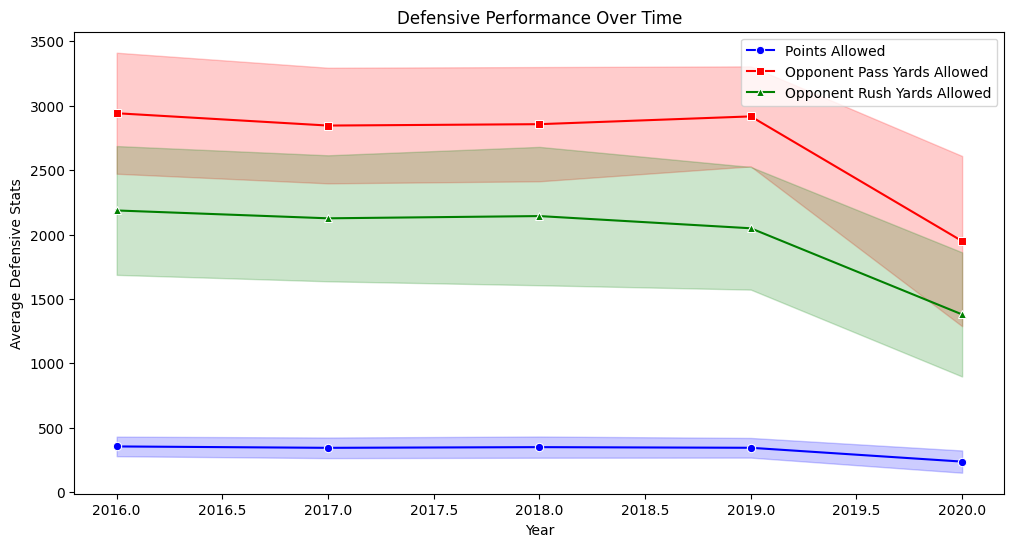

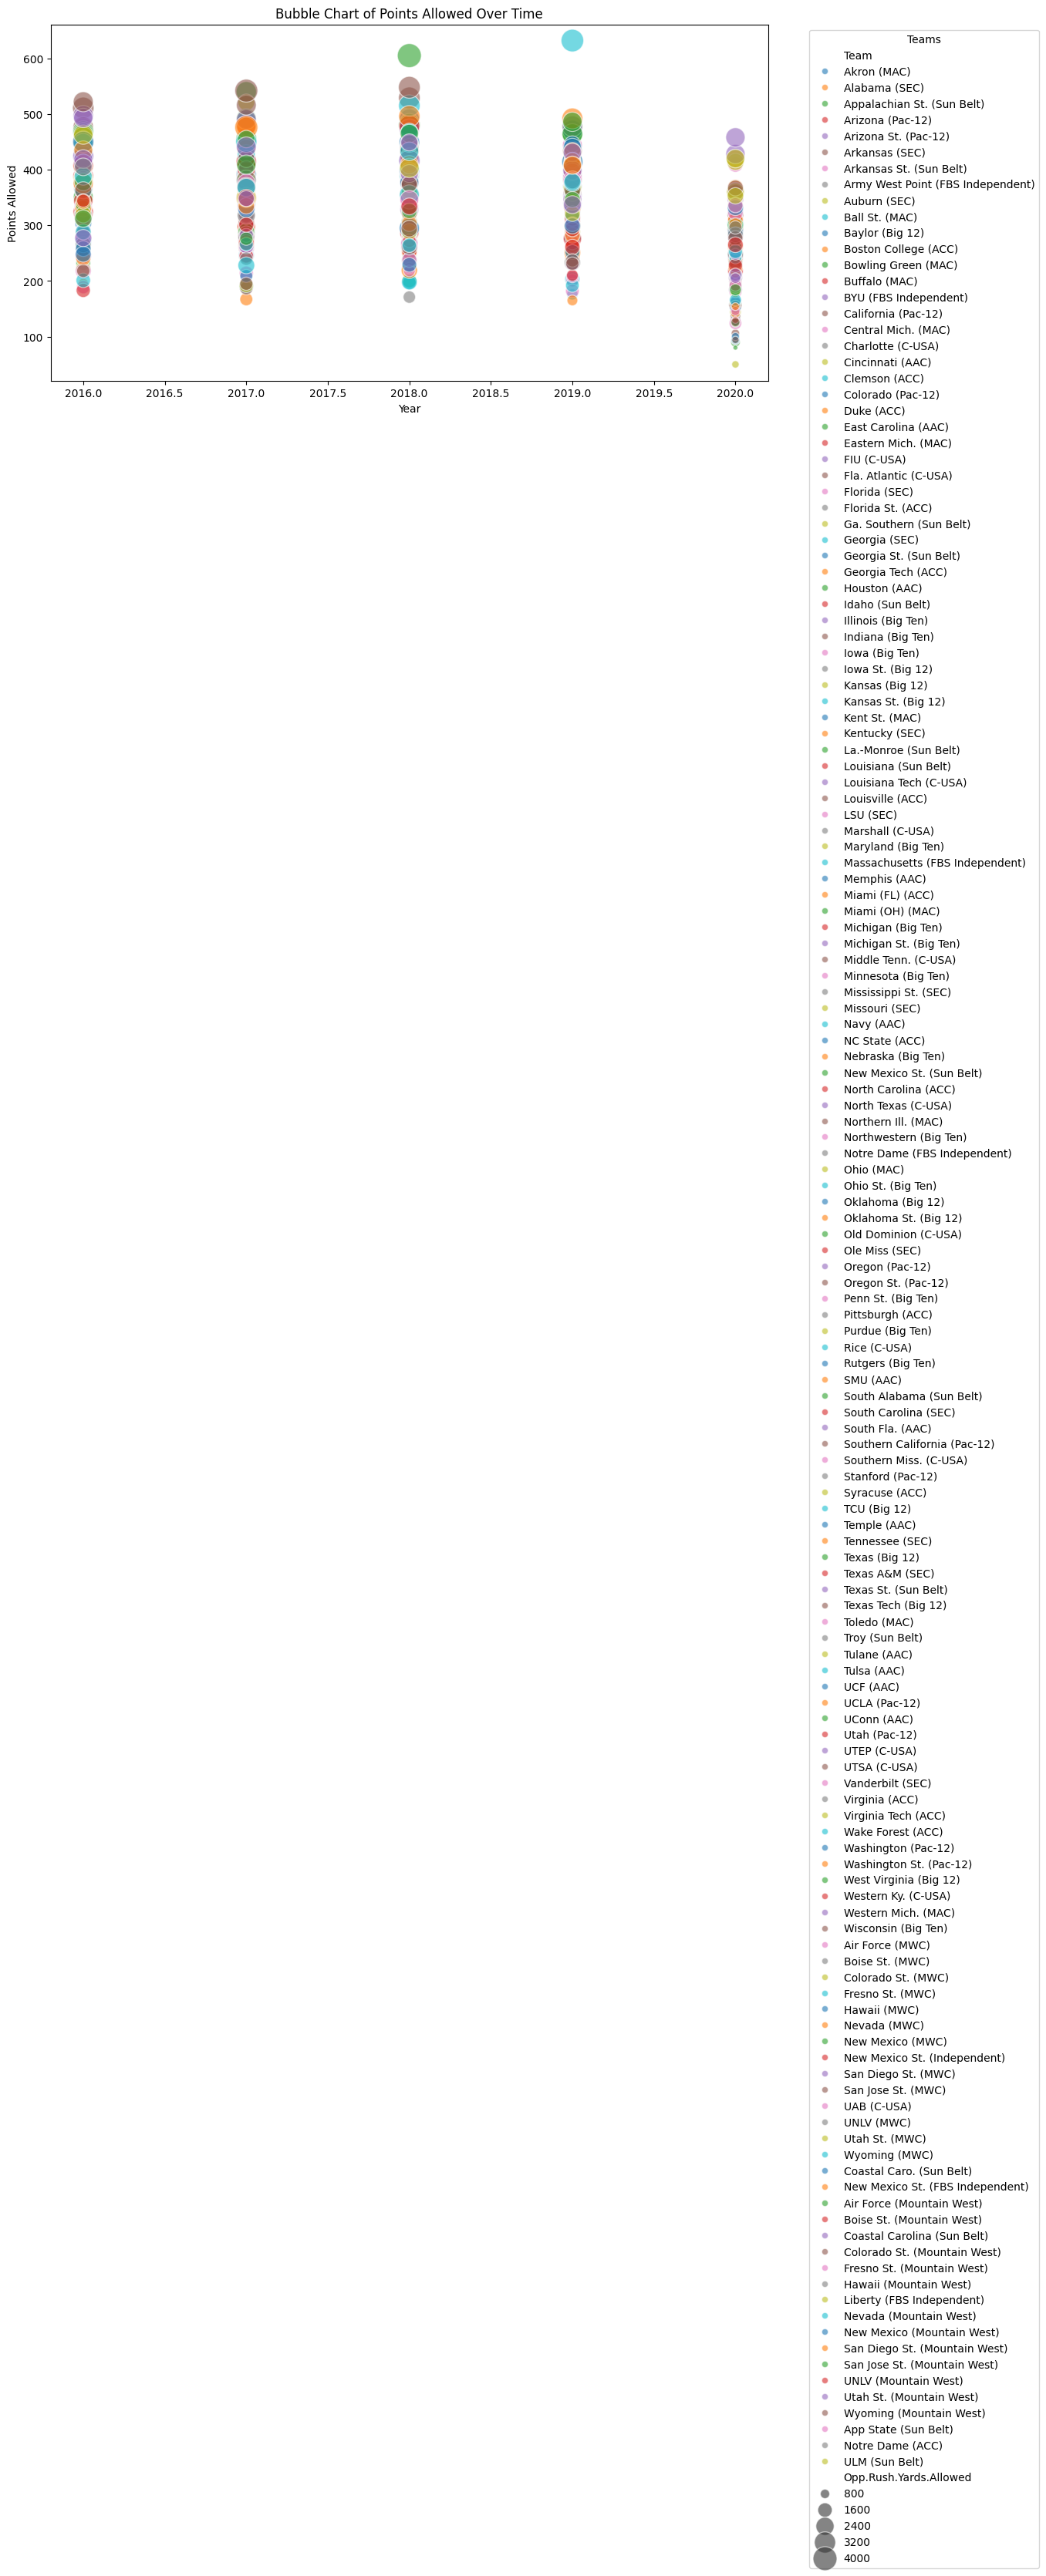

In [ ]:
# Create a few plots showing how each metric changed over time:
df_combined["Year"] = pd.to_numeric(df_combined["Year"], errors="coerce")
df_combined["Points.Allowed"] = pd.to_numeric(df_combined["Points.Allowed"], errors="coerce")
df_combined["Opp.Pass.Yds.Allowed"] = pd.to_numeric(df_combined["Opp.Pass.Yds.Allowed"], errors="coerce")
df_combined["Opp.Rush.Yards.Allowed"] = pd.to_numeric(df_combined["Opp.Rush.Yards.Allowed"], errors="coerce")

# Drop NaN values
df_combined = df_combined.dropna(subset=["Year", "Points.Allowed", "Opp.Pass.Yds.Allowed", "Opp.Rush.Yards.Allowed"])

# Set figure size
plt.figure(figsize=(12, 6))

# --- Line Plot for Defensive Metrics Over Time ---
sns.lineplot(
    x="Year",
    y="Points.Allowed",
    data=df_combined,
    estimator="mean",
    errorbar="sd",  # Shows standard deviation as variability
    marker="o",
    label="Points Allowed",
    color="blue"
)

sns.lineplot(
    x="Year",
    y="Opp.Pass.Yds.Allowed",
    data=df_combined,
    estimator="mean",
    errorbar="sd",
    marker="s",
    label="Opponent Pass Yards Allowed",
    color="red"
)

sns.lineplot(
    x="Year",
    y="Opp.Rush.Yards.Allowed",
    data=df_combined,
    estimator="mean",
    errorbar="sd",
    marker="^",
    label="Opponent Rush Yards Allowed",
    color="green"
)

# Formatting
plt.title("Defensive Performance Over Time")
plt.xlabel("Year")
plt.ylabel("Average Defensive Stats")
plt.legend()
plt.show()

plt.figure(figsize=(12, 6))

# Bubble Chart for Defensive Performance (Points Allowed)
sns.scatterplot(
    x="Year",
    y="Points.Allowed",
    hue="Team",   # Different colors for different teams
    size="Opp.Rush.Yards.Allowed",  # Bubble size based on points allowed
    data=df_combined,
    alpha=0.6,
    sizes=(20, 500),  # Adjusting bubble sizes
    palette="tab10"  # A visually distinct color palette
)

# Formatting
plt.title("Bubble Chart of Points Allowed Over Time")
plt.xlabel("Year")
plt.ylabel("Points Allowed")
plt.legend(title="Teams", bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

Over time you can see that the defense increase overtime this can be seen in the decrease in rushing and passing yards. The Defenses over time have become more elite in holding the offense this is further backed up by the fact the teams in 2020 scored less touchdowns. This can be seen an effect of the increased level of the defense.
